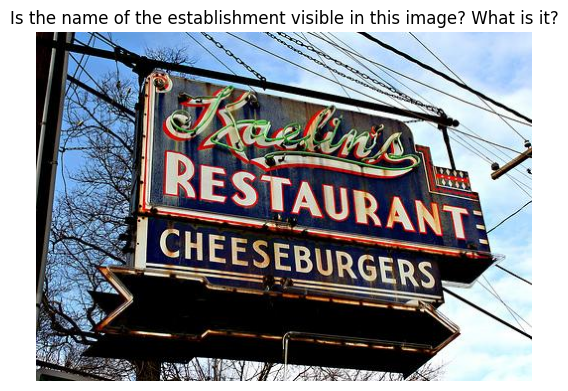

In [4]:
import pandas as pd
from PIL import Image
import io
import matplotlib.pyplot as plt

# 파일 경로 설정
file_path = "/home/dudaji/Jun/npu-service-zoo/data/multimodal/validation-00000-of-00001.parquet"

# Parquet 파일 로드
data = pd.read_parquet(file_path, engine="pyarrow")

# 첫 번째 이미지 가져오기
image_data = data.loc[0, "image"]["bytes"]  # "bytes" 키에서 바이너리 데이터 추출



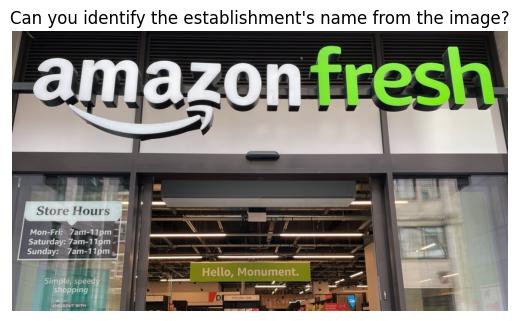

This image shows the entrance to an Amazon Fresh store, which is a chain of grocery stores owned and operated by Amazon. The storefront features large glass windows with white lettering that reads "amazon fresh" in bold, block letters. Above the entrance is a sign that says "Store Hours" in small text, indicating when customers can visit during their opening hours.

The interior of the store appears to be well-lit, with rows upon rows of shelves stocked high with products ranging from fresh produce and meats to household essentials and personal care items. In front of each shelf, there are baskets filled with various fruits and vegetables, while in another area, there's a refrigerated section displaying dairy products and other chilled goods.

At the top left corner of the window, you'll find a sign that reads "Store Hours" along with the days of the week they're open. Below this, another sign lists all available services offered by Amazon Fresh including same-day delivery options for 

In [17]:
import ollama
import numpy as np
from PIL import Image
import io
import base64

# 이미지를 Base64로 인코딩하는 함수
def encode_image_to_base64(image):
    buffer = io.BytesIO()
    image.save(buffer, format="PNG")  # 이미지를 PNG 형식으로 저장
    buffer.seek(0)
    return base64.b64encode(buffer.read()).decode("utf-8")  # Base64 인코딩 후 문자열 반환

# Parquet 파일에서 이미지 가져오기
file_path = "/home/dudaji/Jun/npu-service-zoo/data/multimodal/vqa_test.parquet"
data = pd.read_parquet(file_path, engine="pyarrow")

# 첫 번째 이미지 가져오기 및 변환
image_data = data.loc[0, "image"]["bytes"]  # 이미지 바이트 추출
image = Image.open(io.BytesIO(image_data))  # PIL 이미지로 변환

# 이미지를 Base64로 인코딩
encoded_image = encode_image_to_base64(image)

# Ollama 모델 호출
response = ollama.chat(
    model='llama3.2-vision',
    messages=[{
        'role': 'user',
        'content': data.loc[0, "question"],
        'images': [encoded_image]  # Base64 인코딩된 이미지 추가
    }]
)

# 이미지를 디코딩하고 표시
image = Image.open(io.BytesIO(image_data))
plt.imshow(image)
plt.axis("off")  # 축 제거
plt.title(data.loc[0, "question"])  # 질문을 이미지 제목으로 표시
plt.show()

# 응답 출력
print(response['message']['content'])